In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

- ### Visualize the evolution of Bitcoin over the year 2019: Find a common way to plot this kind of data, and recreate it.

In [1]:
# download bitcoin data

In [3]:
bitcoin_2019_df = pd.read_csv("BTC-2019min.csv")

In [10]:
bitcoin_2019_df.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1577836740,2019-12-31 23:59:00,BTC/USD,7167.30,7171.22,7167.30,7168.36,0.191448,1372.366393
1,1577836680,2019-12-31 23:58:00,BTC/USD,7166.89,7167.30,7161.99,7167.30,0.568868,4077.245538
2,1577836620,2019-12-31 23:57:00,BTC/USD,7164.22,7170.80,7161.65,7166.89,3.959440,28376.874525
3,1577836560,2019-12-31 23:56:00,BTC/USD,7182.49,7182.49,7170.20,7170.20,6.248892,44805.802550
4,1577836500,2019-12-31 23:55:00,BTC/USD,7175.69,7176.68,7175.69,7176.68,0.016877,121.122623


In [9]:
bitcoin_2019_df.dtypes

unix            int64
date           object
symbol         object
open          float64
high          float64
low           float64
close         float64
Volume BTC    float64
Volume USD    float64
dtype: object

In [13]:
# convert date to datetime
bitcoin_2019_df['date'] = pd.to_datetime(bitcoin_2019_df['date'])

In [16]:
bitcoin_2019_df.describe()

,unix,date,open,high,low,close,Volume BTC,Volume USD
count,5.255990e+05,525599,525599.000000,525599.000000,525599.000000,525599.000000,525599.000000,5.255990e+05
mean,1.562069e+09,2019-07-02 11:59:59.999999488,7352.473001,7356.741980,7348.083072,7352.196526,5.693435,4.404477e+04
min,1.546301e+09,2019-01-01 00:01:00,3334.000000,3346.120000,3322.190000,3334.000000,0.000000,0.000000e+00
25%,1.554185e+09,2019-04-02 06:00:30,4696.460000,4701.495000,4690.500000,4696.875000,0.198557,1.369119e+03
50%,1.562069e+09,2019-07-02 12:00:00,7823.560000,7830.000000,7816.970000,7823.110000,1.234636,8.328121e+03
75%,1.569953e+09,2019-10-01 17:59:30,9570.310000,9576.595000,9562.610000,9569.065000,5.089315,3.514645e+04
max,1.577837e+09,2019-12-31 23:59:00,13853.250000,13880.000000,13830.060000,13850.570000,862.230064,7.719620e+06
std,9.103650e+06,NaN,2646.660663,2649.205786,2643.894545,2646.383716,15.542761,1.322508e+05


In [33]:
# line plot of open price per minute

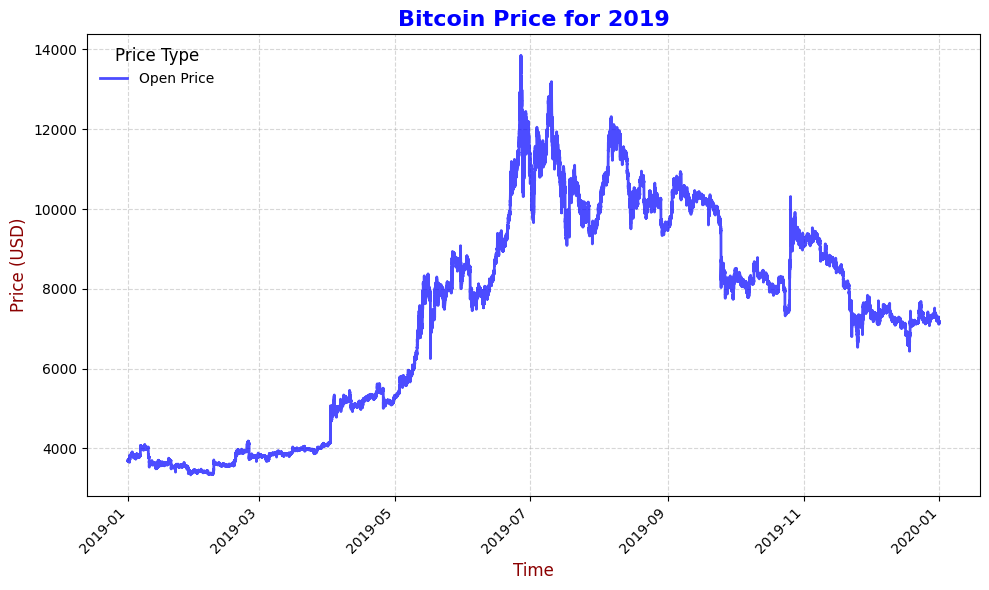

In [68]:
plt.figure(figsize=(10, 6))

# Plot Open Price with improved styling
plt.plot(bitcoin_2019_df['date'], bitcoin_2019_df['open'], 
         label="Open Price", 
         color='blue', 
         linewidth=2, 
         linestyle='-', 
         alpha=0.7)
# Title with larger font
plt.title("Bitcoin Price for 2019", fontsize=16, fontweight='bold', color='blue')

# Labels with custom fonts
plt.xlabel("Time", fontsize=12, color='darkred')
plt.ylabel("Price (USD)", fontsize=12, color='darkred')

# Grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Improve the appearance of the legend
plt.legend(loc='upper left', fontsize=10, frameon=False, title="Price Type", title_fontsize=12)

# Rotate date labels for better readability
plt.xticks(rotation=45, ha='right')

# Add tight layout for proper spacing
plt.tight_layout()

# Show the plot
plt.show()

In [35]:
# calculate daily open and close and plot candlestick

In [53]:
# make date index
bitcoin_2019_dated = bitcoin_2019_df.set_index('date')
# convert to numeric types
bitcoin_2019_dated = bitcoin_2019_dated.apply(pd.to_numeric, errors='coerce')

In [61]:
bitcoin_daily = bitcoin_2019_dated.resample('D').agg({
    'open': 'first',    # First open price of the day
    'high': 'max',      # Maximum high price of the day
    'low': 'min',       # Minimum low price of the day
    'close': 'last'     # Last close price of the day
})

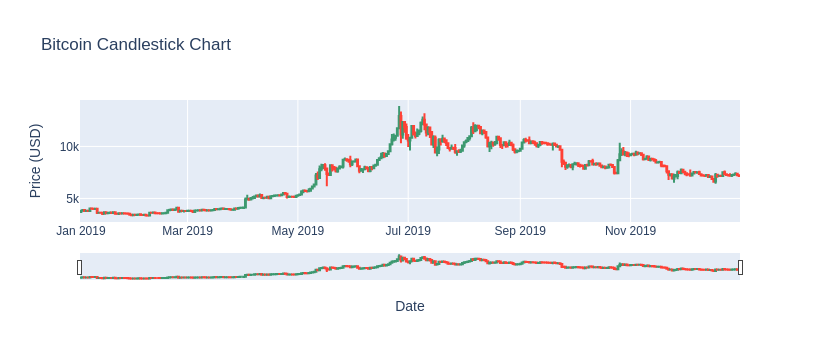

In [62]:
import pandas as pd
import plotly.graph_objects as go



# Create a candlestick chart
fig = go.Figure(data=[go.Candlestick(
    x=bitcoin_daily.index,
    open=bitcoin_daily['open'],
    high=bitcoin_daily['high'],
    low=bitcoin_daily['low'],
    close=bitcoin_daily['close']
)])

# Add title and labels
fig.update_layout(
    title='Bitcoin Candlestick Chart',
    xaxis_title='Date',
    yaxis_title='Price (USD)'
)

# Show the chart
fig.show()


In [63]:
# calculate moving average to see trends

In [86]:
bitcoin_daily['50_day_MA'] = bitcoin_daily['close'].rolling(window=50).mean()

In [87]:
bitcoin_daily

,open,high,low,close,10_day_MA,50_day_MA
date,,,,,,
2019-01-01,3694.72,3845.46,3629.66,3823.44,NaN,NaN
2019-01-02,3825.41,3918.67,3770.00,3885.87,NaN,NaN
2019-01-03,3890.27,3893.40,3760.00,3787.81,NaN,NaN
2019-01-04,3785.64,3850.33,3732.38,3817.71,NaN,NaN
2019-01-05,3822.00,3887.09,3780.00,3791.84,NaN,NaN
...,...,...,...,...,...,...
2019-12-27,7195.17,7255.37,7052.00,7246.00,7248.547,7611.5724
2019-12-28,7247.70,7349.65,7231.00,7296.24,7249.480,7582.1498
2019-12-29,7297.43,7524.46,7274.43,7385.54,7273.077,7553.6164


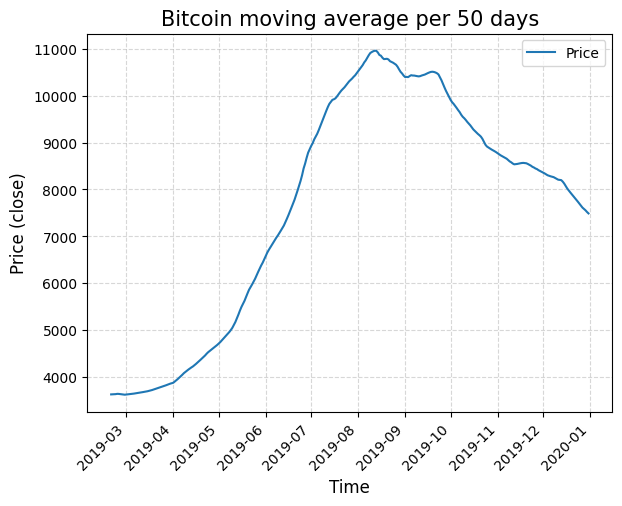

In [90]:
plt.plot(bitcoin_daily.index, bitcoin_daily['50_day_MA'], label="Price")
plt.title("Bitcoin moving average per 50 days", fontsize=15)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Price (close)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.legend()

- ### Create a random walk simulation and visualize the distributions that arise from this process:

In [91]:
# 1D process

In [95]:
n_steps = 1000

In [96]:
moves = np.random.choice([1,-1], size=n_steps)

In [98]:
point_position = np.cumsum(moves)

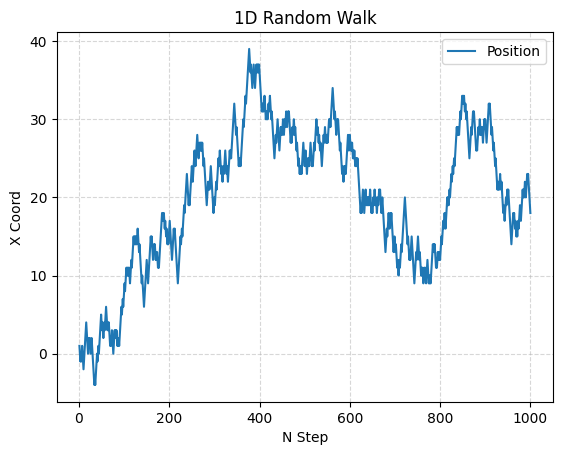

In [110]:
plt.plot(range(1, n_steps+1), point_position, label="Position")
plt.xlabel("N Step")
plt.ylabel("X Coord")
plt.title("1D Random Walk")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

In [112]:
# 2D Walk

In [115]:
moves_dirs = [(1,0),(-1,0), (0,1), (0,-1)]

In [116]:
moves = np.random.choice(range(len(moves_dirs)), size=n_steps)

In [133]:
moves_changes = [moves_dirs[idx] for idx in moves]

In [134]:
positions = np.cumsum(moves_changes, axis=0)

In [138]:
positions_df = pd.DataFrame(positions, columns=['x', 'y'])

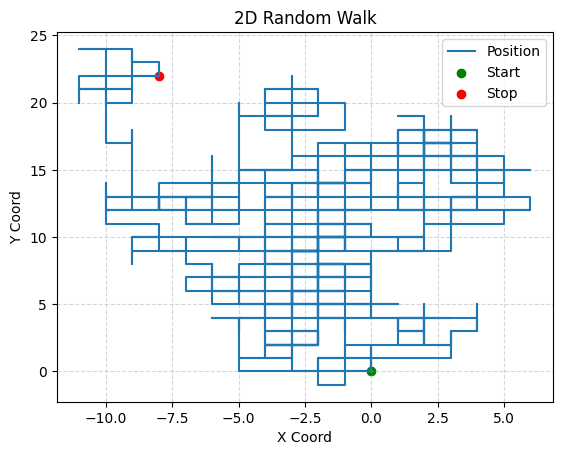

In [157]:
plt.plot(positions_df['x'], positions_df['y'], label="Position")
plt.xlabel("X Coord")
plt.ylabel("Y Coord")
plt.title("2D Random Walk")
plt.scatter(0,0, color="green", label="Start")
plt.scatter(positions_df.iloc[-1]['x'], positions_df.iloc[-1]['y'], color="red", label="Stop")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

In [155]:
# Does your simulation align with the relevant formulas? 

In [175]:
# with increasing number of steps mean should be close to zero (expectation -> 0)

In [186]:
# variance should -> to number of steps

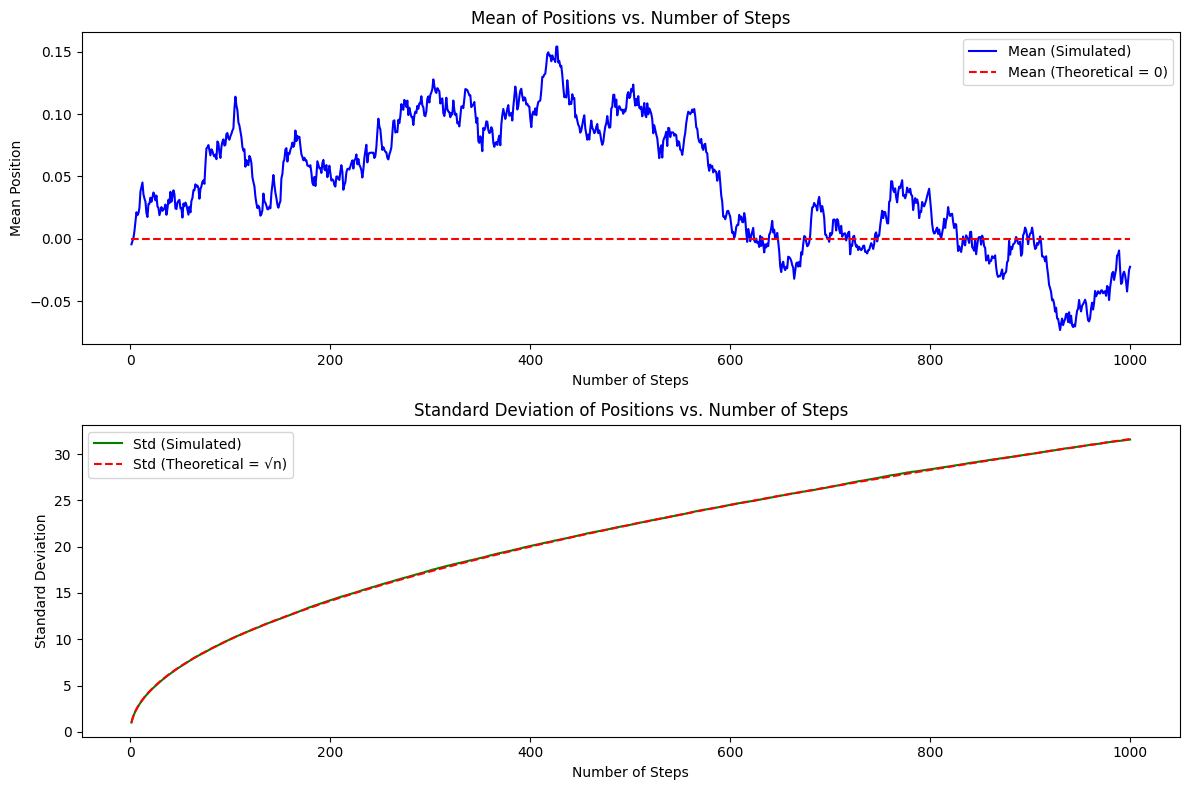

In [264]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_experiments = 30000  # Number of experiments
n_steps = 1000  # Total steps in a single walk

# Simulate random walks
all_walks = np.random.choice([1, -1], size=(num_experiments, n_steps))  # Shape: (num_experiments, n_steps)
cumulative_positions = np.cumsum(all_walks, axis=1)  # Cumulative sum along each row

# Calculate mean and standard deviation for each step
mean_positions = np.mean(cumulative_positions, axis=0)  # Mean across all experiments
std_positions = np.std(cumulative_positions, axis=0)  # Std across all experiments

# Theoretical values
steps = np.arange(1, n_steps + 1)
theoretical_mean = np.zeros_like(steps)
theoretical_std = np.sqrt(steps)

# Plot results
plt.figure(figsize=(12, 8))

# Mean plot
plt.subplot(2, 1, 1)
plt.plot(steps, mean_positions, label="Mean (Simulated)", color="blue")
plt.plot(steps, theoretical_mean, label="Mean (Theoretical = 0)", linestyle="--", color="red")
plt.title("Mean of Positions vs. Number of Steps")
plt.xlabel("Number of Steps")
plt.ylabel("Mean Position")
plt.legend()

# Std plot
plt.subplot(2, 1, 2)
plt.plot(steps, std_positions, label="Std (Simulated)", color="green")
plt.plot(steps, theoretical_std, label="Std (Theoretical = √n)", linestyle="--", color="red")
plt.title("Standard Deviation of Positions vs. Number of Steps")
plt.xlabel("Number of Steps")
plt.ylabel("Standard Deviation")
plt.legend()

plt.tight_layout()
plt.show()


In [281]:
# Introduce biases to the process, vary the range of possible steps in terms of direction and size.

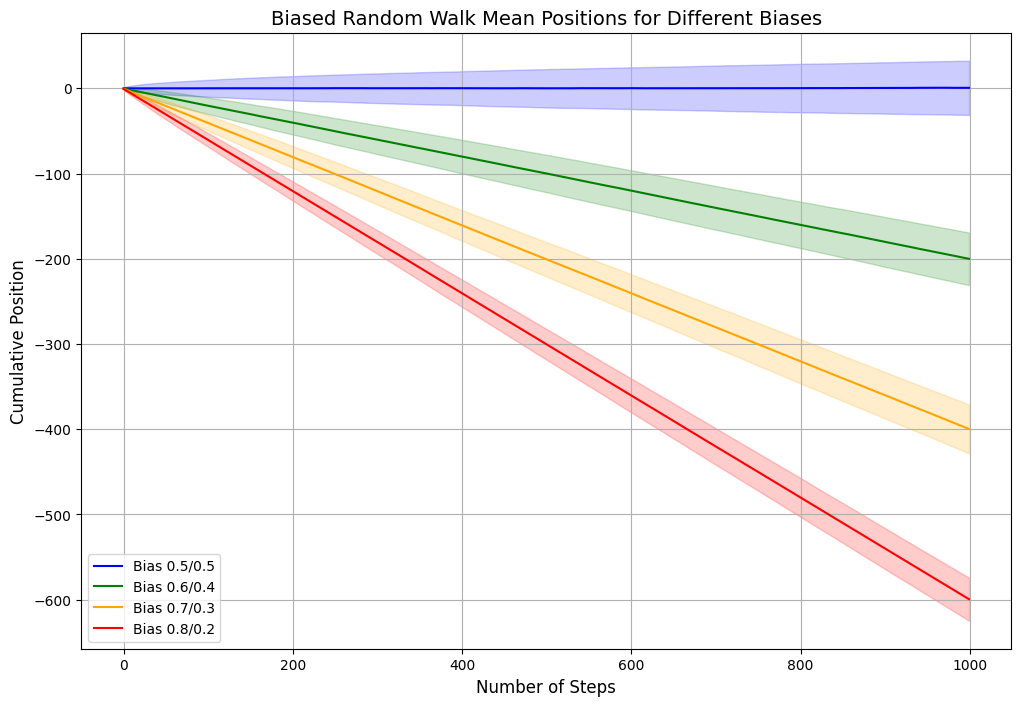

In [280]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_experiments = 5000  # Number of random walks
n_steps = 1000  # Number of steps in each walk

# Different biases
biases = [[0.5, 0.5], [0.6, 0.4], [0.7, 0.3], [0.8, 0.2]]
colors = ['blue', 'green', 'orange', 'red']

# Initialize figure
plt.figure(figsize=(12, 8))

# Simulate and plot for each bias
for bias, color in zip(biases, colors):
    # Simulate biased random walks
    all_walks = np.random.choice([-1, 1], size=(num_experiments, n_steps), p=bias)
    cumulative_positions = np.cumsum(all_walks, axis=1)

    # Calculate statistics
    mean_positions = np.mean(cumulative_positions, axis=0)
    std_positions = np.std(cumulative_positions, axis=0)

    # Plot mean position with standard deviation band
    plt.plot(mean_positions, label=f"Bias {bias[0]}/{bias[1]}", color=color)
    plt.fill_between(range(n_steps), mean_positions - std_positions, mean_positions + std_positions, 
                     color=color, alpha=0.2)

# Add labels, legend, and title
plt.title("Biased Random Walk Mean Positions for Different Biases", fontsize=14)
plt.xlabel("Number of Steps", fontsize=12)
plt.ylabel("Cumulative Position", fontsize=12)
plt.legend()
plt.grid()
plt.show()

### Explore and visualize the Titanic dataset

- Between men and women, who had the higher likelihood of survival?

In [283]:
titanic_df = pd.read_csv("https://github.com/datasciencedojo/datasets/raw/master/titanic.csv")

In [284]:
# pie chart of survival rate

In [321]:
survived = titanic_df.groupby("Sex")["Survived"].sum()

In [322]:
total_count = titanic_df.groupby("Sex")["Survived"].count()

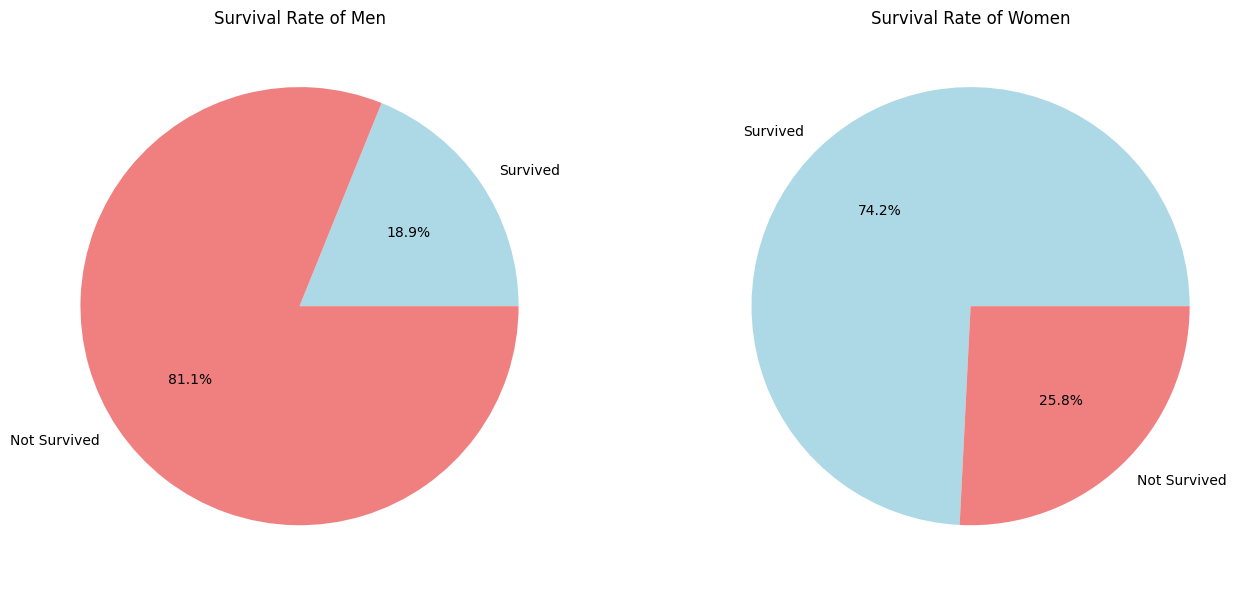

In [324]:
# Calculate survival rates for each gender
survival_rate_men = survived["male"] / total_count["male"]
survival_rate_women = survived["female"] / total_count["female"]

# Prepare the data for the pie charts
labels = ['Survived', 'Not Survived']

# For Men
men_data = [survival_rate_men, 1 - survival_rate_men]
# For Women
women_data = [survival_rate_women, 1 - survival_rate_women]

# Create the plot
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Men
ax[0].pie(men_data, labels=labels, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
ax[0].set_title("Survival Rate of Men")

# Plot for Women
ax[1].pie(women_data, labels=labels, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
ax[1].set_title("Survival Rate of Women")

# Display the plot
plt.tight_layout()
plt.show()

- Which passenger class offered the best value for money?

In [297]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [333]:
class_stats = titanic_df.groupby(by="Pclass").agg({
    "Fare": "mean", 
    "Survived": ["count", "sum"]
})

In [336]:
class_stats.columns = ["Avg_Fare", "Total_Passengers", "Survived_Count"]

In [338]:
class_stats["Survived_Rate"] = class_stats["Survived_Count"] / class_stats["Total_Passengers"]

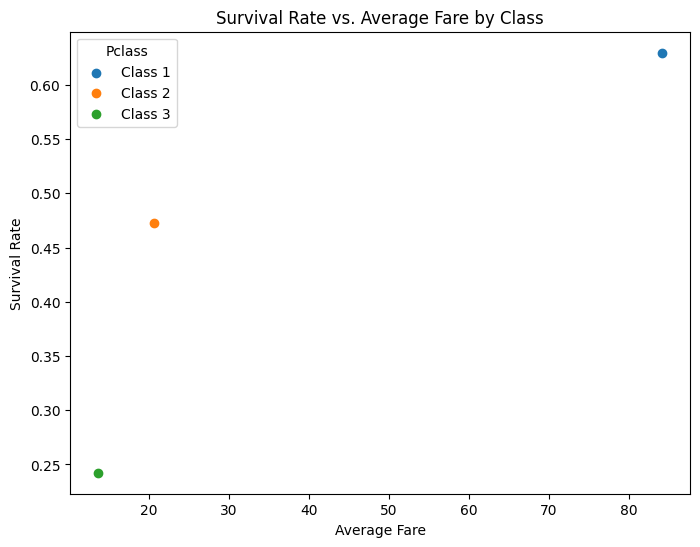

In [348]:
# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot each class with a different label for the legend
for pclass in class_stats.index:
    ax.scatter(
        class_stats.loc[pclass, "Avg_Fare"], 
        class_stats.loc[pclass, "Survived_Rate"], 
        label=f'Class {pclass}'  # Label for the legend
    )

# Set the title and labels
ax.set_title("Survival Rate vs. Average Fare by Class")
ax.set_xlabel("Average Fare")
ax.set_ylabel("Survival Rate")

# Add the legend
ax.legend(title="Pclass")

# Display the plot
plt.show()

- If I were to embark on the Titanic with my child, would I be charged the same fare for both of us?

In [381]:
# calculate average fare per children / per adult

In [391]:
titanic_df.loc[:, "is_child"] = (titanic_df["Age"] < 18)

In [394]:
child_fares = titanic_df.groupby("is_child").agg({"Fare" : "mean"})

<Axes: xlabel='is_child'>

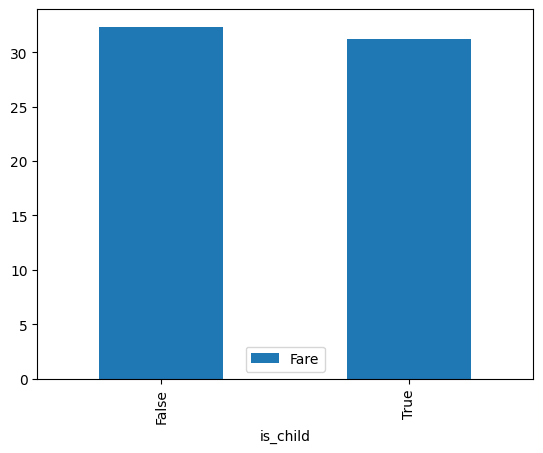

In [396]:
child_fares.plot(kind="bar")

- Would the presence of my child on board affect my chances of survival?

In [355]:
# count percentage of survival of people with child and without

In [360]:
adult_passengers = titanic_df.loc[(titanic_df.Age >= 18)]

In [365]:
adult_passengers.loc[:, "has_child"] = (adult_passengers["Parch"] > 0)

In [376]:
child_stats_df = pd.DataFrame(adult_passengers.groupby(['has_child','Survived'])["PassengerId"].count()).reset_index()

In [378]:
pivot_df = child_stats_df.pivot_table(index='has_child', columns='Survived', values='PassengerId', aggfunc='sum', fill_value=0)

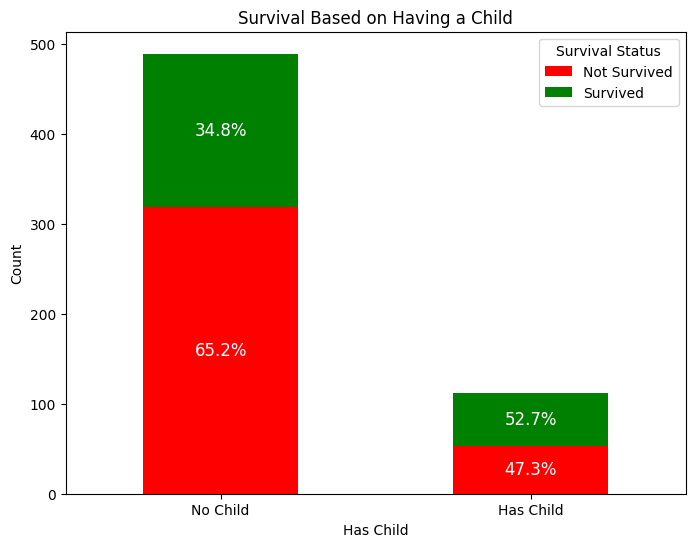

In [380]:
# Plot the stacked bar chart
ax = pivot_df.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(8, 6))

# Set the title and labels
ax.set_title("Survival Based on Having a Child")
ax.set_xlabel("Has Child")
ax.set_ylabel("Count")
ax.set_xticklabels(["No Child", "Has Child"], rotation=0)

# Add the legend
ax.legend(["Not Survived", "Survived"], title="Survival Status")

# Display percentages on the bars
for pclass in pivot_df.index:
    total = pivot_df.loc[pclass].sum()
    for surv in pivot_df.columns:
        count = pivot_df.loc[pclass, surv]
        percentage = (count / total) * 100
        ax.text(pclass, pivot_df.loc[pclass, :surv].sum() - count / 2, f'{percentage:.1f}%', 
                ha='center', va='center', color='white', fontsize=12)

# Display the plot
plt.show()